# Homework 2
Team: <br/>
Sreenivasan Ramesh       1217310193<br/>
Tanush Vinay             1217104733<br/>
Paarvendhan Puviyarasu   1217390616<br/>
Muskan Singhal           1217107320<br/>
## Exercise 1a)

            class 1: x1 =(1,0) and x2 =(−1,0), class 2: x3 =(0,1) and x4 =(0,−1). 
            Find some parameters b1, b2, W1 and W2 such that the scores s satisfy: s1 > s2 for x1 and x2 , 
            s1 < s2 for x3 and x4.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import gc



Using TensorFlow backend.


In [3]:

#to clear previous TF cached graph
gc.collect()

x = np.array([[1,0], [-1,0], [0,1], [0,-1]]) #X1, X2, X3, X4
y = np.array([[1,0], [1,0], [0,1], [0,1]])   #S1, S1, S2, S2


#model
model = Sequential()
model.add(Dense(2, input_shape = (2, ), activation = 'relu', kernel_initializer='glorot_uniform'))
model.add(Dense(2, kernel_initializer='glorot_uniform'))

#training the model
print('training...')
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=None)
model.fit(x, y, epochs=10000, verbose=0)

#Get Weights and biases of layer 1
weights_1 = model.layers[0].get_weights()[0]
biases_1 = model.layers[0].get_weights()[1]

#Get Weights and biases of layer 2
weights_2 = model.layers[1].get_weights()[0]
biases_2 = model.layers[1].get_weights()[1]


print("\nWeights for layer1:\n",weights_1)
print("Biases  for layer1:\n",biases_1,"\n")
print("Weights for layer2:\n",weights_2)
print("Biases  for layer2:\n",biases_2,"\n")



print("Score[s1, s2] for X1 [ 1,0]: ",model.predict(np.array([x[0]])),"\n")
print("Score[s1, s2] for X2 [-1,0]: ",model.predict(np.array([x[1]])),"\n")
print("Score[s1, s2] for X3 [ 0,1]: ",model.predict(np.array([x[2]])),"\n")
print("Score[s1, s2] for X4 [ 0,-1]: ",model.predict(np.array([x[3]])),"\n")

del model
gc.collect()

training...

Weights for layer1:
 [[ 1.6502186e+00 -1.0331191e+00]
 [ 2.7731919e-01  5.7949015e-04]]
Biases  for layer1:
 [-0.28248158 -0.00478579] 

Weights for layer2:
 [[ 0.7310216  -0.73091775]
 [ 0.9724285  -0.9727985 ]]
Biases  for layer2:
 [7.6551514e-06 9.9984914e-01] 

Score[s1, s2] for X1 [ 1,0]:  [[9.9985296e-01 1.4585257e-04]] 

Score[s1, s2] for X2 [-1,0]:  [[ 9.9998826e-01 -5.1194429e-04]] 

Score[s1, s2] for X3 [ 0,1]:  [[7.6551514e-06 9.9984914e-01]] 

Score[s1, s2] for X4 [ 0,-1]:  [[7.6551514e-06 9.9984914e-01]] 



7611

### Note:

One of the outputs we got:<br/><br/>
```
Weights for layer1:
 [[ 0.05851737  0.00580344]
 [-1.7882288   0.85562503]]
Biases  for layer1:
 [-0.71792585 -0.13241728] 

Weights for layer2:
 [[-0.95510155  0.9616221 ]
 [-1.418329    1.3993654 ]]
Biases  for layer2:
 [ 1.012325   -0.01103757] 

Score[s1, s2] for X1 [ 1,0]:  [[ 1.012325   -0.01103757]] 

Score[s1, s2] for X2 [-1,0]:  [[ 1.012325   -0.01103757]] 

Score[s1, s2] for X3 [ 0,1]:  [[-0.01342154  1.0009943 ]] 

Score[s1, s2] for X4 [ 0,-1]:  [[-0.00992298  1.0181894 ]] 
```


## Exercise 1b)
            
Train a two-layer neural network to classify the points. Provide the accuracy of the model(percentage of correctly predicted labels). We used one hot encoding to modify the class. 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 9         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 2ms/sample - loss: 0.1875 - accuracy: 0.9000
Test Accuracy: 90.00


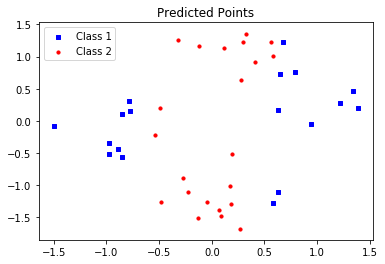

9932

In [5]:
#Shuffle Dataset
df = pd.read_csv('data_HW2_ex1.csv').sample(frac=1).reset_index(drop=True)

#Split into Features and Classes
x = np.column_stack((df['x1'].values,df['x2'].values))
y = df['class'].values

#One Hot Encoding 
#[0,1,0] ---> Class 1
#[0,0,1] ---> Class 2
y = to_categorical(y)

#Train-Test Split ---> 80:20
x_train = x[:int(0.8*len(x))]
x_test = x[int(0.8*len(x)):]
y_train = y[:int(0.8*len(y))]
y_test = y[int(0.8*len(y)):]




#Define the fully connected model
#We are using 2-2-3(Input,Hidden and Output Layer Nodes) 
#Hidden Layer Activation ---> Relu
#Output Layer Activation ---> Softmax 

model = Sequential()
model.add(Dense(2,input_shape = (2,)))
model.add(Dense(2, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))
optimizer = keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

#Summarise the Model Arch 
model.summary()

#Train Model
model.fit(x_train, y_train, epochs=1000, verbose=0)

#Evaluate the keras model for its Test Accuracy
score, accuracy = model.evaluate(x_test, y_test)
print('Test Accuracy: %.2f' % (accuracy*100))

class_1x = []
class_2x = []
class_2y = []
class_1y = []
predicted_op = model.predict(x_test)
for i in range(len(predicted_op)):
    if np.argmax(predicted_op[i]) == 1:
        class_1x.append(x_test[i][0])
        class_1y.append(x_test[i][1])
    else:
        class_2x.append(x_test[i][0])
        class_2y.append(x_test[i][1])

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(class_1x, class_1y, s=10, c='b', marker="s", label='Class 1')
ax1.scatter(class_2x,class_2y, s=10, c='r', marker="o", label='Class 2')
plt.title("Predicted Points")
plt.legend(loc='upper left');
plt.show()

gc.collect()

### Note:
Using more nodes (larger layer) in the hidden layer gives better results for 1b

## 1b - second try

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 18        
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 21        
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________
40/40 [==============================] - 0s 2ms/sample - loss: 0.3059 - accuracy: 0.9500
Test Accuracy: 95.00


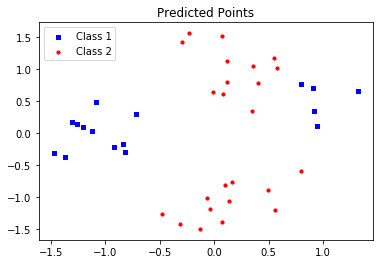

9936

In [6]:
### more nodes in hidden layer 

#Shuffle Dataset
df = pd.read_csv('data_HW2_ex1.csv').sample(frac=1).reset_index(drop=True)

#Split into Features and Classes
x = np.column_stack((df['x1'].values,df['x2'].values))
y = df['class'].values

#One Hot Encoding 
#[0,1,0] ---> Class 1
#[0,0,1] ---> Class 2
y = to_categorical(y)

#Train-Test Split ---> 80:20
x_train = x[:int(0.8*len(x))]
x_test = x[int(0.8*len(x)):]
y_train = y[:int(0.8*len(y))]
y_test = y[int(0.8*len(y)):]




#Define the fully connected model
#We are using 2-4-3(Input,Hidden and Output Layer Nodes) 
#Hidden Layer Activation ---> Relu
#Output Layer Activation ---> Softmax 

model = Sequential()
model.add(Dense(2,input_shape = (2,)))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))
optimizer = keras.optimizers.Adam(learning_rate=0.05)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

#Summarise the Model Arch 
model.summary()

#Train Model
model.fit(x_train, y_train, epochs=1000, verbose=0)

#Evaluate the keras model for its Test Accuracy
score, accuracy = model.evaluate(x_test, y_test)
print('Test Accuracy: %.2f' % (accuracy*100))

class_1x = []
class_2x = []
class_2y = []
class_1y = []
predicted_op = model.predict(x_test)
for i in range(len(predicted_op)):
    if np.argmax(predicted_op[i]) == 1:
        class_1x.append(x_test[i][0])
        class_1y.append(x_test[i][1])
    else:
        class_2x.append(x_test[i][0])
        class_2y.append(x_test[i][1])

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(class_1x, class_1y, s=10, c='b', marker="s", label='Class 1')
ax1.scatter(class_2x,class_2y, s=10, c='r', marker="o", label='Class 2')
plt.title("Predicted Points")
plt.legend(loc='upper left');
plt.show()

gc.collect()

## Exercise 2

Approximating continious finctions with 2 layer NN


Exercise 2a:
Net(
  (hidden1): Linear(in_features=1, out_features=3, bias=True)
  (predict): Linear(in_features=3, out_features=1, bias=True)
)
training the network...


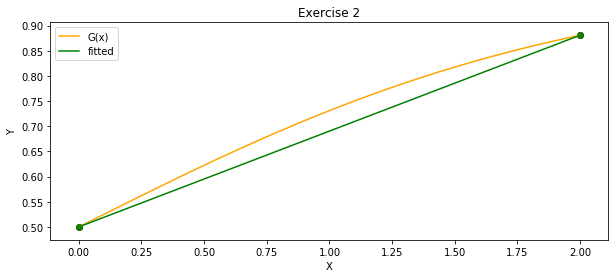

Trained Network:
Number of nodes in hidden layers: 3 (number of points + 1)
hidden1.weight tensor([[-0.6957],
        [-0.0242],
        [-0.8245]])
hidden1.bias tensor([-0.5621, -0.0544,  0.5447])
predict.weight tensor([[-0.2389,  0.5368, -0.6990]])
predict.bias tensor([0.8808])


Exercise 2b:
Net(
  (hidden1): Linear(in_features=1, out_features=4, bias=True)
  (predict): Linear(in_features=4, out_features=1, bias=True)
)
training the network...


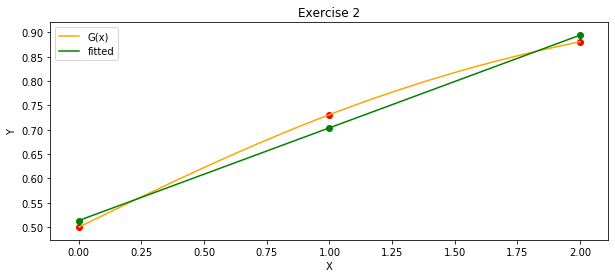

Trained Network:
Number of nodes in hidden layers: 4 (number of points + 1)
hidden1.weight tensor([[-0.9742],
        [-0.0732],
        [ 0.7298],
        [-0.9055]])
hidden1.bias tensor([-0.8981, -0.1035,  0.0058, -0.5211])
predict.weight tensor([[-0.1164, -0.0549,  0.2609,  0.0215]])
predict.bias tensor([0.5120])


Exercise 2c:
Net(
  (hidden1): Linear(in_features=1, out_features=16, bias=True)
  (predict): Linear(in_features=16, out_features=1, bias=True)
)
training the network...


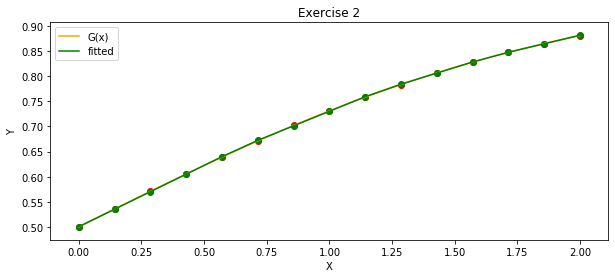

Trained Network:
Number of nodes in hidden layers: 16 (number of points + 1)
hidden1.weight tensor([[-0.1851],
        [ 0.2695],
        [-0.3478],
        [-0.2406],
        [ 0.0184],
        [-0.6030],
        [-0.4683],
        [ 0.0832],
        [-0.1627],
        [-0.5059],
        [ 0.7543],
        [-0.7907],
        [ 0.6821],
        [ 0.1266],
        [ 0.2542],
        [-0.6702]])
hidden1.bias tensor([ 0.5912, -0.9020, -0.1019,  0.4928, -0.3801, -0.0085,  0.3068, -0.0051,
         0.2666,  1.0194, -0.9064, -0.2483,  0.0284,  0.1909, -0.5387, -0.4274])
predict.weight tensor([[ 0.2983, -0.0713,  0.1323, -0.0373, -0.0147, -0.0483, -0.0877,  0.0076,
         -0.2212,  0.1405, -0.0638, -0.0688,  0.3828,  0.1750, -0.0853, -0.0762]])
predict.bias tensor([0.2412])


In [22]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

'''Define any function to be used as input'''
gx = lambda x: 1 / (1 + np.exp(-x))
#gx = lambda x: np.sin(2 * np.pi * x)

def get_n_data_points(gx, start, end, num_points, x=None):
    '''Either pass num_points to use linspace to sample, 
       or x can be passed manually to override with selected points'''
    if not x:
        x = torch.unsqueeze(torch.linspace(start, end, num_points), dim=1)
    y = torch.unsqueeze(torch.from_numpy(np.array([gx(x[i]) for i in range(len(x))])), dim=1)
    return x, y

def get_plotting_points(gx, start, end, num_points, x=None):
    '''This function gets say 500 points to plot the function g(x) on the graph'''
    x = torch.unsqueeze(torch.linspace(start, end, 500), dim=1)
    y = torch.unsqueeze(torch.from_numpy(np.array([gx(x[i]) for i in range(len(x))])), dim=1)
    return x, y


#2 layer Neural Network with a one hidden layer
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden1, n_output):
        super(Net, self).__init__()
        self.hidden1 = torch.nn.Linear(n_feature, n_hidden1)
        self.predict = torch.nn.Linear(n_hidden1, n_output)
  
    def forward(self, x):
        x = F.relu(self.hidden1(x)) # ReLU activation
        x = self.predict(x)
        return x

def piecewise_linear(gx, start, end, num_points):
    x, y = get_n_data_points(gx, start=start, end=end, num_points=num_points)
    x, y = Variable(x), Variable(y)
    #width = num + 1
    net = Net(n_feature=1, n_hidden1=num_points+1, n_output=1)#.cuda()
    optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
    loss_func = torch.nn.MSELoss()
    print(net)
    print('training the network...')
    for epoch in range(1, 10000):
        net.train()
        optimizer.zero_grad()
        pred = net(x)
        loss = loss_func(pred, y)
        loss.backward()
        optimizer.step()

    y_pred = net(x)
    p_x, p_y = get_plotting_points(gx, start, end, 100, x=None)
      
    # view data
    plt.figure(figsize=(10,4))
    plt.plot(p_x.data.numpy(), p_y.data.numpy(), color = "orange", label='''G(x)''')
    plt.scatter(x.data.numpy(), y.data.numpy(), color = "red")
    plt.scatter(x.data.numpy(), y_pred.data.numpy(), color = "green")
    plt.plot(x.data.numpy(), y_pred.data.numpy(), color = "green", label='''fitted''')
    plt.title('Exercise 2')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

    print("Trained Network:\nNumber of nodes in hidden layers: {} (number of points + 1)".format(num_points+1))
    for name, param in net.named_parameters(): 
        if param.requires_grad: 
            print(name, param.data)
    return net


def ex_2a():
    print('\nExercise 2a:')
    num_points = 2
    trained_model = piecewise_linear(gx, start=0, end=2, num_points=num_points)

def ex_2b():
    print('\n\nExercise 2b:')
    num_points = 3
    trained_model = piecewise_linear(gx, start=0, end=2, num_points=num_points)

def ex_2c():
    print('\n\nExercise 2c:')
    num_points = 15
    piecewise_linear(gx, start=0, end=2, num_points=num_points)


ex_2a()
ex_2b()
ex_2c()


### Let's try piecewise interpolation on different g(x)'s to validate our result

Net(
  (hidden1): Linear(in_features=1, out_features=16, bias=True)
  (predict): Linear(in_features=16, out_features=1, bias=True)
)
training the network...


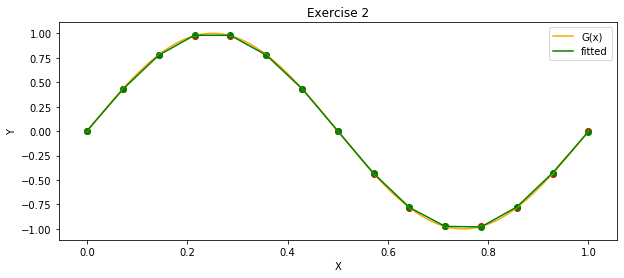

Trained Network:
Number of nodes in hidden layers: 16 (number of points + 1)
hidden1.weight tensor([[-1.1307],
        [ 1.7633],
        [ 2.0030],
        [-1.5625],
        [-0.3456],
        [-0.8197],
        [-0.4776],
        [ 2.4617],
        [-3.1497],
        [ 0.0579],
        [ 1.9179],
        [-0.9378],
        [ 1.2357],
        [-0.9409],
        [ 1.5608],
        [ 0.8656]])
hidden1.bias tensor([ 1.0087e+00, -2.0822e-01, -1.2369e+00,  1.3782e+00, -9.0546e-02,
         7.0468e-01,  8.5028e-01, -1.8511e+00,  7.8623e-01, -1.6296e-01,
        -7.3758e-01,  9.4179e-01, -1.7463e-04, -3.2459e-01,  2.4869e-05,
        -9.0086e-01])
predict.weight tensor([[ 0.6063, -1.7528,  1.6763,  1.2411,  0.1817,  0.5083, -0.2925,  2.2642,
         -1.7999, -0.0502, -1.6936, -0.7047,  0.9553, -0.1066,  0.8534, -0.2292]])
predict.bias tensor([-0.3476])
Net(
  (hidden1): Linear(in_features=1, out_features=16, bias=True)
  (predict): Linear(in_features=16, out_features=1, bias=True)
)
traini

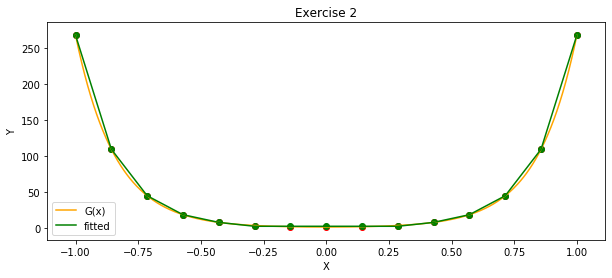

Trained Network:
Number of nodes in hidden layers: 16 (number of points + 1)
hidden1.weight tensor([[-13.0683],
        [ 16.0763],
        [ 16.0895],
        [ -0.3709],
        [-15.6782],
        [ -0.0356],
        [  0.1610],
        [-12.5486],
        [-15.2157],
        [ 10.3545],
        [ -0.5745],
        [ 17.5347],
        [  0.0736],
        [ 16.4936],
        [-15.0932],
        [-17.4211]])
hidden1.bias tensor([ -7.7979, -10.4026, -13.0478,  -0.5415, -12.8869,  -0.7459,  -0.9069,
         -4.4730, -12.7347,  -3.6912,  -0.6082, -14.9804,  -0.4076, -13.5852,
        -11.0946, -14.9290])
predict.weight tensor([[ 1.0166e+01,  1.4454e+01,  1.5184e+01,  3.4590e-02,  1.3449e+01,
         -1.6231e-01, -6.0707e-03,  5.9787e+00,  1.4576e+01,  7.2472e+00,
         -1.1041e-01,  1.7221e+01,  1.1334e-01,  1.5564e+01,  1.2482e+01,
          1.6157e+01]])
predict.bias tensor([2.0096])


Net(
  (hidden1): Linear(in_features=1, out_features=16, bias=True)
  (predict): Linear(in_features=16, out_features=1, bias=True)
)

In [23]:
gx = lambda x: np.sin(2 * np.pi * x)
piecewise_linear(gx, start=0, end=1, num_points=15)

gx = lambda x: np.cosh(2 * np.pi * x)
piecewise_linear(gx, start=-1, end=1, num_points=15)


## Exercise 3

**4-CNN MODEL**: We are uing a model with 4 layers of Convolutions with Batch Normalization and Dropout, followed by two fully connected layers. Along with Data Augumentation, we acheive an accuracy of 93.2%


In [1]:
from torch.optim.lr_scheduler import ReduceLROnPlateau, StepLR
from torchvision import datasets
from torch.utils.data import DataLoader
import torch
from torch import nn
from torchvision import transforms
import torch.nn.functional as F
from torch import optim
import numpy as np
from tqdm import tnrange, tqdm_notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


epochs=35
batch_size=256
learning_rate=0.001
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

#prep dataset
trans = transforms.Compose([
                            #transforms.RandomCrop(28, padding=4),
                            #transforms.RandomRotation(degrees=(15,-15)),
                            transforms.RandomHorizontalFlip(p=0.5),
                            transforms.RandomPerspective(distortion_scale=0.2, p=0.2),
                            transforms.ToTensor(), 
                            transforms.Normalize((0.3536915,), (0.3907847,)),
                            ])
trans1 = transforms.Compose([ 
                            transforms.ToTensor(), 
                            transforms.Normalize((0.3536915,), (0.3907847,)),
                            ])
training_set = datasets.FashionMNIST('data', train=True, download=True, transform=trans)
testing_set = datasets.FashionMNIST('data', train=False, download=True, transform=trans1)
train_data = DataLoader(training_set, shuffle=True, batch_size=batch_size)
test_data = DataLoader(testing_set, shuffle=False, batch_size=batch_size)



#model definition
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            #nn.Dropout(0.2),
            nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            #nn.Dropout(0.2)
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.2),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=2),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.2),
        )

        self.fc1 = nn.Sequential(
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2)
        )

        self.fc2 = nn.Linear(64, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out)
        return out


def weights_init(m):
    if isinstance(m, nn.Conv2d):
        torch.nn.init.xavier_uniform_(m.weight)
        torch.nn.init.zeros_(m.bias)


net = CNN()
if torch.cuda.is_available():
    net = CNN().cuda()    
net.apply(weights_init)
cal_loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)
#scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=10, verbose=True, min_lr = 0.0001)

print(net)



Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw
Processing...
Done!
CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(2, 2))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.2, inplace=False)
    (5): Conv2d(64, 128,

In [2]:
###training the model

train_acc = list()
train_loss_list = list()
test_acc = list()
test_loss_list = list()
lr_list = list()

for epoch in range(1, epochs+1):
    print ("Epoch {}".format(epoch))
    running_loss = 0
    training_accuracy = 0
    net.train()
    for img, lbl in train_data:
        img, lbl = img.to(device), lbl.to(device)
        optimizer.zero_grad()
        score = net(img)
        loss = cal_loss(score, lbl)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.detach().cpu().numpy()
        training_accuracy += (score.argmax(dim=1)==lbl).sum().cpu().numpy()
    #scheduler.step(0)
    print('LR = ', optimizer.param_groups[0]['lr'])

    test_running_loss = 0
    test_accuracy = 0
    net.eval()
    with torch.no_grad():
        for img,lbl in test_data:
            img,lbl = img.to(device), lbl.to(device)
            score = net(img)
            loss = cal_loss(score, lbl)
            test_running_loss += loss.detach().cpu().numpy()
            test_accuracy += (score.argmax(dim=1)==lbl).sum().cpu().numpy()

    train_loss = running_loss/len(train_data)
    test_loss = test_running_loss/len(test_data)
    training_accuracy /= len(training_set)
    test_accuracy /= len(testing_set)
    train_acc.append(training_accuracy)
    train_loss_list.append(train_loss)
    test_acc.append(test_accuracy)
    test_loss_list.append(test_loss)
    lr_list.append(optimizer.param_groups[0]['lr'])

    print('    loss     (train, test): {:.4f},  {:.4f}'.format(train_loss, test_loss))
    print('    accuracy (train, test): {:.4f},  {:.4f}'.format(training_accuracy, test_accuracy)) 
    
    if epoch in [13, 18, 21, 23, 25, 27, 39, 30, 31]:
        optimizer.param_groups[0]['lr'] = optimizer.param_groups[0]['lr']/2


Epoch 1
LR =  0.01
    loss     (train, test): 0.5807,  0.3857
    accuracy (train, test): 0.7903,  0.8572
Epoch 2
LR =  0.01
    loss     (train, test): 0.3868,  0.3327
    accuracy (train, test): 0.8606,  0.8804
Epoch 3
LR =  0.01
    loss     (train, test): 0.3390,  0.2955
    accuracy (train, test): 0.8784,  0.8909
Epoch 4
LR =  0.01
    loss     (train, test): 0.3141,  0.3082
    accuracy (train, test): 0.8882,  0.8817
Epoch 5
LR =  0.01
    loss     (train, test): 0.2975,  0.2612
    accuracy (train, test): 0.8917,  0.9050
Epoch 6
LR =  0.01
    loss     (train, test): 0.2842,  0.2773
    accuracy (train, test): 0.8973,  0.8968
Epoch 7
LR =  0.01
    loss     (train, test): 0.2764,  0.3087
    accuracy (train, test): 0.9000,  0.8799
Epoch 8
LR =  0.01
    loss     (train, test): 0.2641,  0.2599
    accuracy (train, test): 0.9052,  0.9037
Epoch 9
LR =  0.01
    loss     (train, test): 0.2610,  0.2477
    accuracy (train, test): 0.9068,  0.9068
Epoch 10
LR =  0.01
    loss     (tra

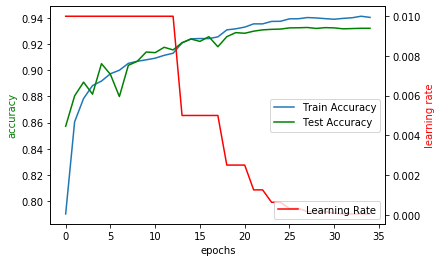

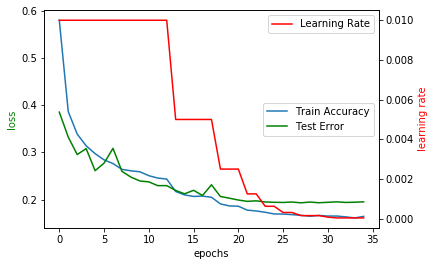

In [3]:

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_xlabel('epochs')
ax1.plot(pd.Series(train_acc), label='Train Accuracy')
ax1.plot(pd.Series(test_acc), color='green', label='Test Accuracy')
ax1.set_ylabel('accuracy', color='green')
ax2 = ax1.twinx()
ax2.plot(pd.Series(lr_list), color='r', label='Learning Rate')
ax2.set_ylabel('learning rate', color='r')
ax1.legend(loc=7)
ax2.legend(loc=4)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_xlabel('epochs')
ax1.plot(pd.Series(train_loss_list), label='Train Accuracy')
ax1.plot(pd.Series(test_loss_list), color='green', label='Test Error')
ax1.set_ylabel('loss', color='green')
ax2 = ax1.twinx()
ax2.plot(pd.Series(lr_list), color='r', label='Learning Rate')
ax2.set_ylabel('learning rate', color='r')
ax1.legend(loc=7)
ax2.legend(loc=1)
